# Assignment 2

In [141]:
# Importing the required libraries

import numpy as np
import pandas as pd
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support

%matplotlib inline

## Problem 1: K means clustering

#### Perform k means clustering on the [r,g,b] pixel data of the image 'chilis.jpg' for k = 3 clusters. Terminate the algorithm when the cluster means do not change in an iteration. 

You can initialize the cluster centers as:
*   $c_1=[255, 0, 0]$
*   $c_2=[0,0,0]$
*   $c_3=[255,255,255]$

In order to visualise the output, replace all pixels corresponding to a cluster with it's mean value. Display this image along with the cluster means.

Code the algorithm from scratch without using libraries like scikit-learn.  




In [112]:
# Importing the image

img = Image.open("./chilis.jpg")

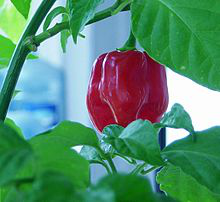

In [113]:
img

In [114]:
img_array = np.array(img)

In [115]:
# Defining distance function


def distance(p1, p2):
    return (np.sqrt(
        np.square(p1[0] - p2[0]) + np.square(p1[1] - p2[1]) +
        np.square(p1[2] - p2[2])))

In [116]:
#Defining cluster centers

c1 = np.array([255, 0, 0])
c2 = np.array([0, 0, 0])
c3 = np.array([255, 255, 255])

# Running the k-means algorithm

iteration = 1
while (True):
    print(f"Iteration {iteration}")
    c1_list = {'r': [], 'g': [], 'b': []}
    c2_list = {'r': [], 'g': [], 'b': []}
    c3_list = {'r': [], 'g': [], 'b': []}
    old_c1 = c1
    old_c2 = c2
    old_c3 = c3
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            d1 = distance(c1, img_array[i][j])
            d2 = distance(c2, img_array[i][j])
            d3 = distance(c3, img_array[i][j])
            min_d = min(d1, d2, d3)
            if (min_d == d1):
                c1_list['r'].append(img_array[i][j][0])
                c1_list['g'].append(img_array[i][j][1])
                c1_list['b'].append(img_array[i][j][2])
            elif (min_d == d2):
                c2_list['r'].append(img_array[i][j][0])
                c2_list['g'].append(img_array[i][j][1])
                c2_list['b'].append(img_array[i][j][2])
            elif (min_d == d3):
                c3_list['r'].append(img_array[i][j][0])
                c3_list['g'].append(img_array[i][j][1])
                c3_list['b'].append(img_array[i][j][2])
    c1 = np.array([
        int(np.mean(c1_list['r'])),
        int(np.mean(c1_list['g'])),
        int(np.mean(c1_list['b']))
    ])
    c2 = np.array([
        int(np.mean(c2_list['r'])),
        int(np.mean(c2_list['g'])),
        int(np.mean(c2_list['b']))
    ])
    c3 = np.array([
        int(np.mean(c3_list['r'])),
        int(np.mean(c3_list['g'])),
        int(np.mean(c3_list['b']))
    ])
    print("\nOld c1,c2,c3 are : \n")
    print("old_c1 : ", end="")
    print(old_c1)
    print("old_c2 : ", end="")
    print(old_c2)
    print("old_c3 :", end="")
    print(old_c3)
    print("\nNew c1,c2,c3 are :\n")
    print("c1 : ", end="")
    print(c1)
    print("c2 : ", end="")
    print(c2)
    print("c3 : ", end="")
    print(c3)
    print('\n')
    if ((c1 == old_c1).all() and (c2 == old_c2).all()
            and (c3 == old_c3).all()):
        print("k-means algorithm over!")
        break
    iteration += 1

Iteration 1

Old c1,c2,c3 are : 

old_c1 : [255   0   0]
old_c2 : [0 0 0]
old_c3 :[255 255 255]

New c1,c2,c3 are :

c1 : [145  35  70]
c2 : [ 44 117  61]
c3 : [156 204 216]


Iteration 2

Old c1,c2,c3 are : 

old_c1 : [145  35  70]
old_c2 : [ 44 117  61]
old_c3 :[156 204 216]

New c1,c2,c3 are :

c1 : [128  27  60]
c2 : [ 37 127  63]
c3 : [157 205 218]


Iteration 3

Old c1,c2,c3 are : 

old_c1 : [128  27  60]
old_c2 : [ 37 127  63]
old_c3 :[157 205 218]

New c1,c2,c3 are :

c1 : [128  27  59]
c2 : [ 37 128  63]
c3 : [158 205 218]


Iteration 4

Old c1,c2,c3 are : 

old_c1 : [128  27  59]
old_c2 : [ 37 128  63]
old_c3 :[158 205 218]

New c1,c2,c3 are :

c1 : [128  27  59]
c2 : [ 37 128  63]
c3 : [158 205 218]


k-means algorithm over!


In [117]:
# Creating new image by replacing the pixel with centroid pixel

new_img_array = np.zeros(shape=img_array.shape)

for i in range(img_array.shape[0]):
    for j in range(img_array.shape[1]):
        d1 = distance(c1, img_array[i][j])
        d2 = distance(c2, img_array[i][j])
        d3 = distance(c3, img_array[i][j])
        min_d = min(d1, d2, d3)
        if (min_d == d1):
            new_img_array[i][j] = c1
        elif (min_d == d2):
            new_img_array[i][j] = c2
        elif (min_d == d3):
            new_img_array[i][j] = c3

In [118]:
new_img = Image.fromarray(new_img_array.astype('uint8'), 'RGB')

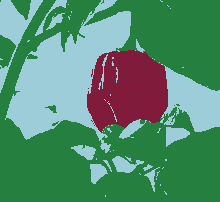

In [119]:
new_img

## Problem 2: S.V.M

The Support Vector Machine(S.V.M) algorithm is to find the hyperplane in the N-dimensional space (N-Number of features) that distinctly classifies the data points.

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. The objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

### Problem 2, Part A: Linear S.V.M


Use dataset A (``data_prob2_parta.csv``)  for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into the training data (75%) and testing data(25%) randomly.




In [13]:
data = pd.read_csv('data_prob2_parta.csv')
data.head()

,Input Feature,Input Feature.1,Output
0,39.146901,81.434567,0.0
1,18.251029,15.692596,1.0
2,10.292564,19.760821,1.0
3,16.880855,27.446969,1.0
4,42.867947,83.981230,0.0


In [14]:
X = ['Input Feature', 'Input Feature.1']
y = ['Output']

X_train, X_test, y_train, y_test = train_test_split(data[X],
                                                    data[y],
                                                    test_size=0.25)

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels)

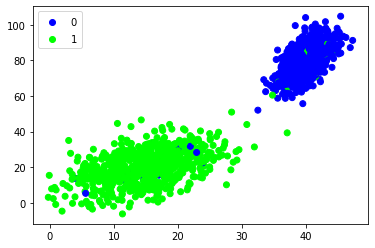

In [15]:
scatter = plt.scatter(X_train['Input Feature'],
                      X_train['Input Feature.1'],
                      c=y_train['Output'],
                      cmap="brg")
plt.legend(*scatter.legend_elements())
plt.show()

Build the Support Vector Machine  model using the 
training data. The scikit
library can be used to build the model.

In [172]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train[X], y_train[y].values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Print the parameter and support vectors.


In [173]:
print("Parameters : ")
print(svclassifier.coef_, svclassifier.intercept_)
print("Support Vectors : ")
print(svclassifier.support_vectors_)

Parameters : 
[[-0.04359544 -0.03809379]] [3.15871847]
Support Vectors : 
[[17.42892087 22.93380586]
 [38.43174221 61.90969023]
 [14.28610322 18.10796038]
 [35.95122378 65.43363213]
 [35.26748712 63.01863759]
 [37.22081976 64.4997884 ]
 [36.34819289 61.03454732]
 [14.6389332  12.97488091]
 [21.94812082 31.7188856 ]
 [12.47373207 11.92473513]
 [17.80095926 26.8048466 ]
 [34.50262259 59.92686312]
 [36.61707429 63.09316071]
 [12.08390918 12.98080114]
 [35.28692854 68.65691032]
 [11.7772565  20.13917583]
 [39.39783579 64.13456794]
 [37.13564241 61.52524901]
 [36.34617903 67.19467151]
 [35.59219832 58.75245073]
 [35.8372741  60.97872753]
 [38.55264801 64.55484457]
 [34.85676444 64.2409918 ]
 [16.07890988 32.93822951]
 [33.41762451 69.13007414]
 [39.51008363 55.68330331]
 [12.14039488 17.53280255]
 [17.06792828 15.55166994]
 [33.70943045 62.42362159]
 [36.08653741 66.06073322]
 [ 5.60837683  5.3320432 ]
 [36.73287633 66.35303823]
 [11.48920131 13.05380759]
 [11.57980684 13.45010625]
 [10.527

Print the final accuracy on the test data.


In [187]:
pred = svclassifier.predict(X_test)
acc = sum(pred == y_test.values.ravel()) / len(pred)
print(f"Accuracy = {round(acc*100,2)}%")

Accuracy = 98.29%


### Problem 2, Part B: Non-linear S.V.M

 Use Dataset B (``data_prob2_partb.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [16]:
data = pd.read_csv('data_prob2_partb.csv')
data.head()

,Input Feature,Input Feature.1,Output
0,-0.973170,-0.313476,0.0
1,-0.166915,-0.759030,1.0
2,-1.002325,-0.058528,0.0
3,-0.384879,0.868446,0.0
4,0.586091,0.487222,1.0


In [17]:
X = ['Input Feature', 'Input Feature.1']
y = ['Output']

X_train, X_test, y_train, y_test = train_test_split(data[X],
                                                    data[y],
                                                    test_size=0.25,
                                                    random_state=1)

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).


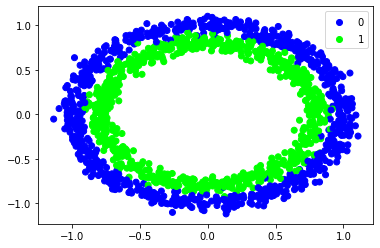

In [18]:
scatter = plt.scatter(X_train['Input Feature'],
                      X_train['Input Feature.1'],
                      c=y_train['Output'],
                      cmap="brg")
plt.legend(*scatter.legend_elements())
plt.show()



Write the code for
choosing best hyperparameters for each of the kernel type.
In text cell after that report the following numbers:
Report the best kernel parameters, regularisation parametes, accuracy for ***linear***, ***RBF*** and ***poly*** kernels(Linear kernels has no kernel parameter).

Note: The scikit library can be used in this case.

In [58]:
# Linear

param_grid = {"C": [0.001, 0.01, 0.1, 1, 10]}

grid_lin = GridSearchCV(SVC(kernel="linear"), param_grid, refit=True)
grid_lin.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [59]:
print("Best parameters", end=" : ")
print(grid_lin.best_params_)
print("Best accuracy", end=" : ")
print(round(grid_lin.best_score_ * 100, 2))

Best parameters : {'C': 0.001}
Best accuracy : 50.67


In [60]:
# RBF

param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10],
    "gamma": [0.001, 0.01, 0.1, 1, 10]
}

grid_rbf = GridSearchCV(SVC(kernel="rbf"), param_grid, refit=True)
grid_rbf.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [61]:
print("Best parameters", " : ")
print(grid_rbf.best_params_)
print("Best accuracy", " : ")
print(round(grid_rbf.best_score_ * 100, 2))

Best parameters  : 
{'C': 10, 'gamma': 0.1}
Best accuracy  : 
97.9


In [62]:
# Poly

param_grid = {"C": [0.001, 0.01, 0.1, 1, 10], "degree": [1, 2, 3, 4, 5]}

grid_poly = GridSearchCV(SVC(kernel="poly"), param_grid, refit=True)
grid_poly.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'degree': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [63]:
print("Best parameters", " : ")
print(grid_poly.best_params_)
print("Best accuracy", " : ")
print(round(grid_poly.best_score_ * 100, 2))

Best parameters  : 
{'C': 0.1, 'degree': 2}
Best accuracy  : 
98.03


Report your observation in the given table:





Kernels | Linear | RBF | Poly
--- | --- | --- |---
Kernel Parameters |None  |0.001 | 2
Regularization Parameters |0.1 | 0.1 | 0.01
Accuracy |97.59  | 97.59 |97.59





Plot the scatter plot for the test data.On top of this scatter plot, plot the decision regions for each of the kernels with their best fit

In [64]:
# Creating mesh for plotting decision boundary
h = .035
x_min, x_max = X_test.values[:, 0].min() - 1, X_test.values[:, 0].max() + 1
y_min, y_max = X_test.values[:, 1].min() - 1, X_test.values[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z_lin = grid_lin.best_estimator_.predict((np.c_[xx.ravel(), yy.ravel()]))
Z_rbf = grid_rbf.best_estimator_.predict((np.c_[xx.ravel(), yy.ravel()]))
Z_poly = grid_poly.best_estimator_.predict((np.c_[xx.ravel(), yy.ravel()]))

/home/omshripc/.pyenv/versions/3.7.4/envs/elec-ml/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: No contour levels were found within the data range.
  This is separate from the ipykernel package so we can avoid doing imports until


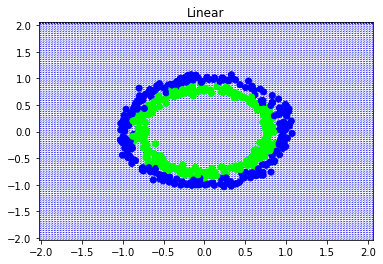

In [65]:
plt.title("Linear")
Z_lin = Z_lin.reshape(xx.shape)
plt.contour(xx, yy, Z_lin, cmap=plt.cm.binary)
plt.scatter(xx, yy, c=Z_lin, cmap="brg", edgecolor='w')
scatter = plt.scatter(X_test['Input Feature'],
                      X_test['Input Feature.1'],
                      c=y_test['Output'],
                      cmap="brg")
plt.show()

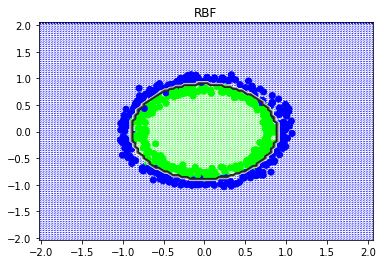

In [66]:
plt.title("RBF")
Z_rbf = Z_rbf.reshape(xx.shape)
plt.contour(xx, yy, Z_rbf, cmap=plt.cm.binary)
plt.scatter(xx, yy, c=Z_rbf, cmap="brg", edgecolor='w')
scatter = plt.scatter(X_test['Input Feature'],
                      X_test['Input Feature.1'],
                      c=y_test['Output'],
                      cmap="brg")
plt.show()

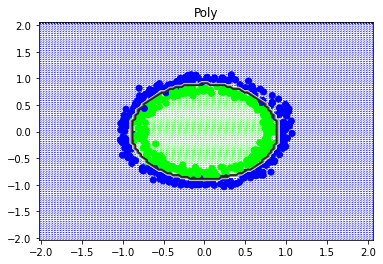

In [67]:
plt.title("Poly")
Z_poly = Z_poly.reshape(xx.shape)
plt.contour(xx, yy, Z_poly, cmap=plt.cm.binary)
plt.scatter(xx, yy, c=Z_poly, cmap="brg", edgecolor='w')
scatter = plt.scatter(X_test['Input Feature'],
                      X_test['Input Feature.1'],
                      c=y_test['Output'],
                      cmap="brg")
plt.show()

### Problem 2, Part C: Multiclass Classification

Use Dataset C (``data_prob2_partc.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [2]:
data = pd.read_csv('data_prob2_partc.csv')
data.head()

,Input Feature,Input Feature.1,Output
0,-1.396342,0.084977,0.0
1,1.878268,-0.190694,1.0
2,-1.910399,1.315481,1.0
3,1.517623,0.213485,0.0
4,-3.422065,-1.020059,2.0


In [3]:
X = ['Input Feature', 'Input Feature.1']
y = ['Output']

X_train, X_test, y_train, y_test = train_test_split(data[X],
                                                    data[y],
                                                    test_size=0.25,
                                                    random_state=1)

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

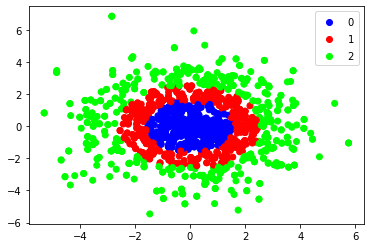

In [7]:
scatter = plt.scatter(X_train['Input Feature'],
                      X_train['Input Feature.1'],
                      c=y_train['Output'],
                      cmap='brg')
plt.legend(*scatter.legend_elements())
plt.show()

Build the Support Vector Machine  model using the 
training data. The scikit
library can be used to build the model.

In [50]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train[X], y_train[y].values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Print the final accuracy on the test data.

In [51]:
pred = svclassifier.predict(X_test)
acc = sum(pred == y_test.values.ravel()) / len(pred)
print(f"Accuracy = {round(acc*100,2)}%")

Accuracy = 97.0%


Plot the scatter plot for the test data. On top of this scatter plot, plot the decision boundary.

In [59]:
# Creating mesh for plotting decision boundary
h = .1
x_min, x_max = X_test.values[:, 0].min() - 1, X_test.values[:, 0].max() + 1
y_min, y_max = X_test.values[:, 1].min() - 1, X_test.values[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svclassifier.predict((np.c_[xx.ravel(), yy.ravel()]))

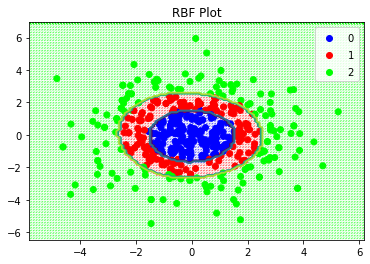

In [64]:
plt.title("RBF Plot")
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z)
plt.scatter(xx, yy, c=Z, cmap="brg", edgecolor='w')
scatter = plt.scatter(X_test['Input Feature'],
                      X_test['Input Feature.1'],
                      c=y_test['Output'],
                      cmap="brg")
plt.legend(*scatter.legend_elements(),loc="upper right")
plt.show()

## Problem 3 : Principal Component Analysis

#### In this exercise you will perform face recognition using eigenfaces. Face recognition can be formulated as a classification task, where the inputs are images and the outputs are people's names.

Load grayscale images from the LFW - Labeled faces in the Wild dataset using scikit-learn. To reduce the number of classes, retain pictures of only those people that have atleast 100 different pictures. (already done for you here) </br></br>
Report the number of images and the size of each image.

In [68]:
lfw_people = fetch_lfw_people(min_faces_per_person=100)

Split the dataset into training and test sets in the ratio - 7:3.

In [79]:
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
y = lfw_people.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

Use scikit-learn's PCA class to perform dimensionality reduction on the training set images. Reduce the dimensions to 100 principal components. These principal components are the eigenfaces.

In [100]:
n_components = 100

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

Reshape the principal eigenvectors into images and visualize the eigenfaces. Display 10 eigenfaces. 

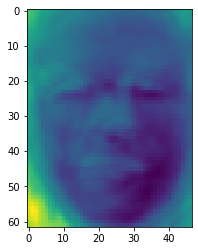

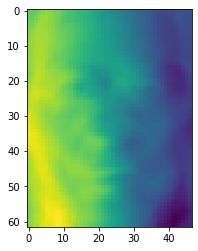

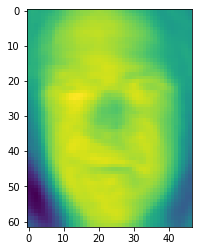

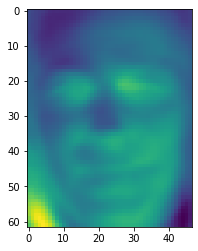

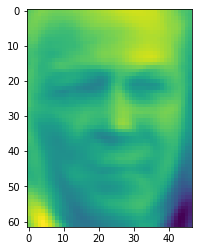

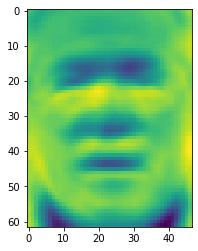

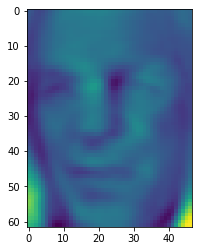

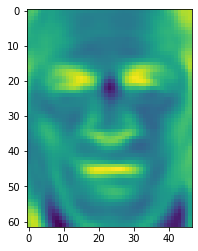

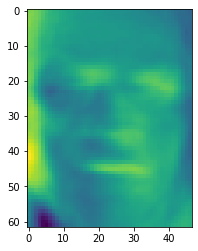

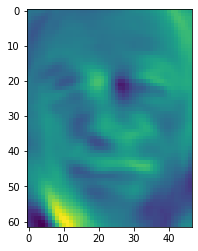

In [101]:
eigenfaces = pca.components_.reshape((n_components, h, w))

for i in range(10):
    plt.imshow(eigenfaces[i,:,:])
    plt.show()

Reconstruct any image (from training / test set) by projecting the image onto the new eigenface space. </br>
*   Display the reconstructed image along with the original image.
*   Report the reconstruction mean squared error. 

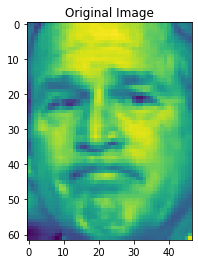

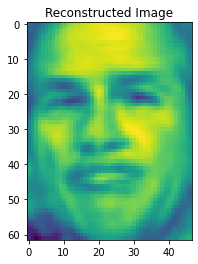

MSE = 286687.28125


In [157]:
img = lfw_people.data[0].reshape(1,-1)
img_fit = pca.inverse_transform(pca.transform(img))
plt.title("Original Image")
plt.imshow(img.reshape(h,w))
plt.show()
plt.title("Reconstructed Image")
plt.imshow(img_fit.reshape(h,w))
plt.show()

mse = np.sum(np.square(np.subtract(img,img_fit)))
print(f"MSE = {mse}")

Now that you have a reduced-dimensionality vector, train a single hidden layer neural network classifier with the person names as outputs and the reduced image vectors as input. You can use scikit-learn's MLPClassifier, with the number of neurons in the hidden layer set to 1024. 

In [134]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [138]:
neural_classifier = MLPClassifier(hidden_layer_sizes=[1024])
neural_classifier.fit(X_train_pca,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[1024], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Now test your network's predictions on the test set and print out the precision, recall and support values for each class. Also display the images (say, 10 test images) along with the true and the  predicted label.

In [142]:
pred = neural_classifier.predict(X_test_pca)

score = precision_recall_fscore_support(y_test,pred)

In [145]:
print("Precision : ",end="")
print(score[0])
print("Recall : ",end="")
print(score[1])
print("Support : ",end="")
print(score[3])

Precision : [0.86885246 0.9375     0.90151515 0.86206897 0.90322581]
Recall : [0.86885246 0.83333333 0.97540984 0.80645161 0.8       ]
Support : [ 61  36 122  31  35]


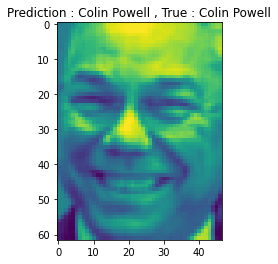

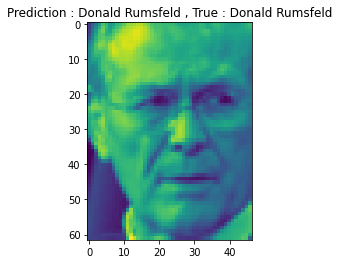

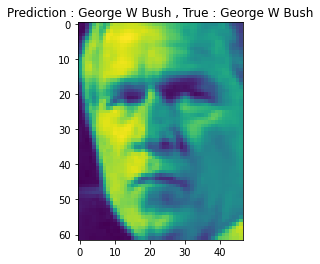

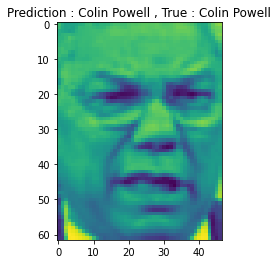

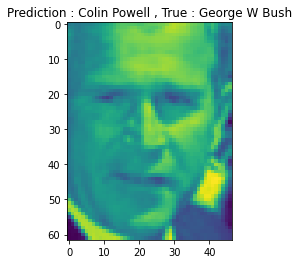

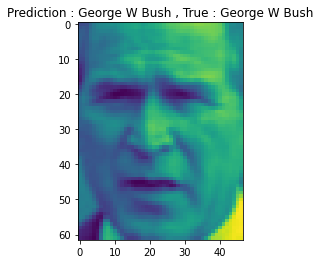

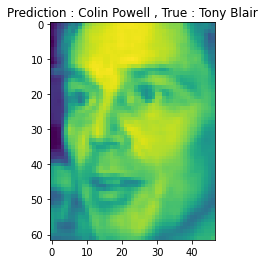

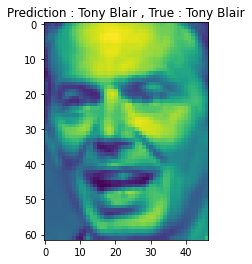

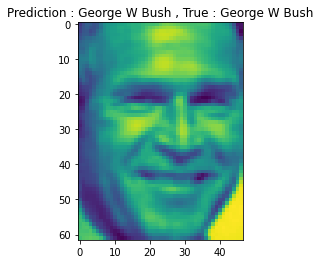

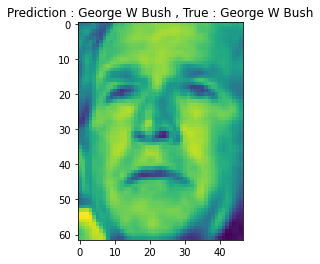

In [155]:
for i in range(10):
    plt.title(f"Prediction : {lfw_people.target_names[pred[i]]} , True : {lfw_people.target_names[y_test[i]]}")
    plt.imshow(X_test[i].reshape(h,w))
    plt.show()

Repeat all the above steps for different values of number of principal components or eigen faces - 100, 150 and 200. Explain the change in the proportion of the total variance explained by the eigenfaces and reconstruction mean squared error with increase in the number of eigenfaces.



Number of components : 100


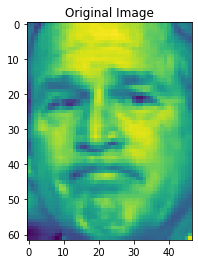

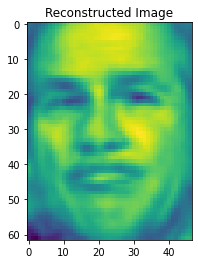

Total Variance Explained Ratio : 0.9225348234176636
MSE = 272094.84375


Number of components : 150


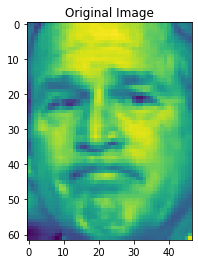

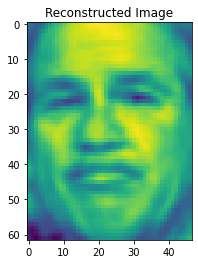

Total Variance Explained Ratio : 0.9522183537483215
MSE = 191085.3125


Number of components : 200


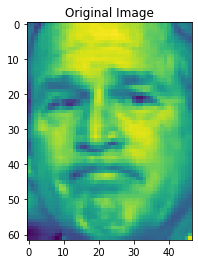

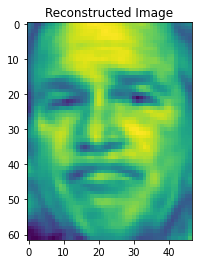

Total Variance Explained Ratio : 0.9688018560409546
MSE = 121473.46875


In [163]:
for n_components in [100,150,200]:
    pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
    
    
    print(f"\n\nNumber of components : {n_components}")
    img = lfw_people.data[0].reshape(1,-1)
    img_fit = pca.inverse_transform(pca.transform(img))
    plt.title("Original Image")
    plt.imshow(img.reshape(h,w))
    plt.show()
    plt.title("Reconstructed Image")
    plt.imshow(img_fit.reshape(h,w))
    plt.show()
    
    print(f"Total Variance Explained Ratio : {np.sum(pca.explained_variance_ratio_)}")
    mse = np.sum(np.square(np.subtract(img,img_fit)))
    print(f"MSE = {mse}")

We see that as the number of components increase, the number of features being explained increases as there are more spaces to explore, thus increasing the total variance explained. Also, since the number of spaces increase, the complexity of the transform increases and it is able to store more of the data, thus decreasing the MSE of reconstructed image